In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from tqdm import tqdm

In [2]:
def simuLOI(LOI):
    u = np.random.rand()
    return np.where(u < np.cumsum(LOI))[0][0]

def simusLOI(LOI,N):
    U = np.zeros(N)
    for i in range(N):
        U[i] = simuLOI(LOI)
    return U.astype(int)

In [12]:
N_utilisateurs = 10
N_competences = 20

# Création d'une matrice de compétences: 

Une colonne = les niveaux de compétences d'une personne

0 : ne sait pas du tout faire

1 : sait faire sous surveillance

2 : sait faire en autonomie

3 : sait expliquer à quelqu'un d'autre

In [14]:
M = np.zeros((N_competences,N_utilisateurs))

for i in range(N_utilisateurs):
    
    proba = np.random.exponential(.25)
    M[:,i] = np.random.binomial(3,proba,N_competences)
    
M

array([[0., 2., 0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 2., 1., 2., 0., 1., 1., 1., 0., 0.],
       [0., 2., 0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 2., 1., 3., 0., 0., 0., 2., 1., 0.],
       [2., 3., 0., 2., 0., 0., 0., 2., 0., 1.],
       [0., 1., 0., 3., 0., 0., 1., 0., 1., 0.],
       [1., 1., 0., 1., 0., 2., 0., 0., 1., 2.],
       [0., 0., 0., 2., 0., 0., 1., 0., 1., 1.],
       [1., 3., 2., 2., 1., 0., 0., 1., 1., 1.],
       [0., 1., 0., 1., 0., 1., 0., 1., 2., 0.],
       [1., 2., 0., 2., 0., 0., 0., 0., 0., 2.],
       [1., 1., 0., 3., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 3., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 2., 0., 1., 2., 1., 1., 0.],
       [0., 1., 0., 3., 0., 2., 0., 1., 0., 1.],
       [1., 1., 0., 2., 0., 0., 1., 2., 1., 2.],
       [1., 1., 1., 2., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 2., 0., 0., 3., 1., 1., 0.],
       [0., 1., 1., 2., 0., 0., 0., 0., 1., 0.],
       [0., 3., 0., 2., 0., 0., 1., 0., 0., 1.]])

# Scores des compétences :

In [15]:
scores_comp = np.sum(M,axis=1)
scores_comp /= scores_comp.sum()
scores_comp

array([0.03496503, 0.05594406, 0.03496503, 0.06293706, 0.06993007,
       0.04195804, 0.05594406, 0.03496503, 0.08391608, 0.04195804,
       0.04895105, 0.03496503, 0.03496503, 0.05594406, 0.05594406,
       0.06993007, 0.04195804, 0.05594406, 0.03496503, 0.04895105])

# Score des utilisateurs :

In [16]:
scores_uts = np.sum(M,axis=0)
scores_uts /= scores_uts.max()
scores_uts

array([0.225, 0.75 , 0.15 , 1.   , 0.05 , 0.225, 0.25 , 0.3  , 0.3  ,
       0.325])

# Pour chaque utilisateur, s'il a déjà travaillé sur tel projet, on créé une "Matrice historique projet"

Dans une colonne : 1 si l'utilisateur a déja travaillé, 0 sinon

In [18]:
N_projets = 17
Mp = np.zeros((N_projets, N_utilisateurs))

for i in range(N_utilisateurs):
    Mp[:,i] = np.random.binomial(1,scores_uts[i]*.3, N_projets)
    
Mp

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

Ce calcul est fait de telle manière qu'un utilisateurs ayant bcp de compétences soit sur plusieurs projets tandis qu'un utlisateur n'ayant que peu de compétence est en général sur très peu de projets.

# Génération d'une liste de tâches. Chaque tâche comporte un identifiant, une durée, une unique compétence requise, un projet auquel elle fait référence.

In [24]:
N_taches = 50
id_taches = np.arange(N_taches)
projets_taches = np.random.randint(0,N_projets,N_taches)
comp_taches = simusLOI(scores_comp,N_taches)
durees_taches = (np.random.poisson(3,N_taches)*2 + 1 )/4

df = pd.DataFrame({'ID tache':id_taches,"Durée":durees_taches, "Compétence":comp_taches,'Projet':projets_taches})

# Export de la matrice de compétences, de la matrice d'historique projets, et des tâches à répartir

In [294]:
#df.to_excel("tâches.xlsx")

## ON VERRA PLUS TARD

In [22]:
dispo_uts = np.floor(np.random.normal(40,5,N_utilisateurs))

tasks = df[['ID tache','Durée',"Compétence","Projet"]].values.T
ids = df['ID tache'].values
aff = np.random.randint(0,N_utilisateurs,N_taches)

x = np.array([ids,aff])

In [25]:
df["Assignée à"] =""
df.head(10)

,ID tache,Durée,Compétence,Projet,Assignée à
0,0,1.75,8,9,
1,1,3.75,7,7,
2,2,2.75,3,11,
3,3,1.25,1,5,
4,4,0.75,2,12,
5,5,0.25,18,12,
6,6,2.75,10,7,
7,7,1.75,9,11,
8,8,1.75,9,1,
9,9,0.75,6,4,


In [26]:
for i in range(N_projets):
    print('Projet',i,':',df.loc[df['Projet']==i,'Durée'].sum(),'h')

Projet 0 : 6.75 h
Projet 1 : 15.25 h
Projet 2 : 4.0 h
Projet 3 : 2.25 h
Projet 4 : 0.75 h
Projet 5 : 8.25 h
Projet 6 : 4.5 h
Projet 7 : 16.75 h
Projet 8 : 2.75 h
Projet 9 : 2.5 h
Projet 10 : 4.0 h
Projet 11 : 6.5 h
Projet 12 : 3.5 h
Projet 13 : 1.25 h
Projet 14 : 0.0 h
Projet 15 : 7.5 h
Projet 16 : 2.5 h


In [27]:
for i in range(N_competences):
    print('Compétence',i,':',df.loc[df['Compétence']==i,'Durée'].sum(),'h', scores_comp[i])

Compétence 0 : 1.5 h 0.03496503496503497
Compétence 1 : 3.5 h 0.055944055944055944
Compétence 2 : 0.75 h 0.03496503496503497
Compétence 3 : 14.75 h 0.06293706293706294
Compétence 4 : 10.5 h 0.06993006993006994
Compétence 5 : 4.75 h 0.04195804195804196
Compétence 6 : 2.0 h 0.055944055944055944
Compétence 7 : 3.75 h 0.03496503496503497
Compétence 8 : 7.75 h 0.08391608391608392
Compétence 9 : 9.25 h 0.04195804195804196
Compétence 10 : 3.5 h 0.04895104895104895
Compétence 11 : 5.0 h 0.03496503496503497
Compétence 12 : 5.0 h 0.03496503496503497
Compétence 13 : 0.25 h 0.055944055944055944
Compétence 14 : 2.75 h 0.055944055944055944
Compétence 15 : 2.25 h 0.06993006993006994
Compétence 16 : 3.5 h 0.04195804195804196
Compétence 17 : 1.5 h 0.055944055944055944
Compétence 18 : 0.25 h 0.03496503496503497
Compétence 19 : 6.5 h 0.04895104895104895


20.0 % des tâches ont été affectées à des personnes non impliquées dans le projet concerné.
20.0 % des tâches ont été affectées à des personnes non impliquées dans le projet concerné.
20.0 % des tâches ont été affectées à des personnes non impliquées dans le projet concerné.
20.0 % des tâches ont été affectées à des personnes non impliquées dans le projet concerné.
20.0 % des tâches ont été affectées à des personnes non impliquées dans le projet concerné.
20.0 % des tâches ont été affectées à des personnes non impliquées dans le projet concerné.
20.0 % des tâches ont été affectées à des personnes non impliquées dans le projet concerné.
10 utilisateurs 20 compétences 17 projets


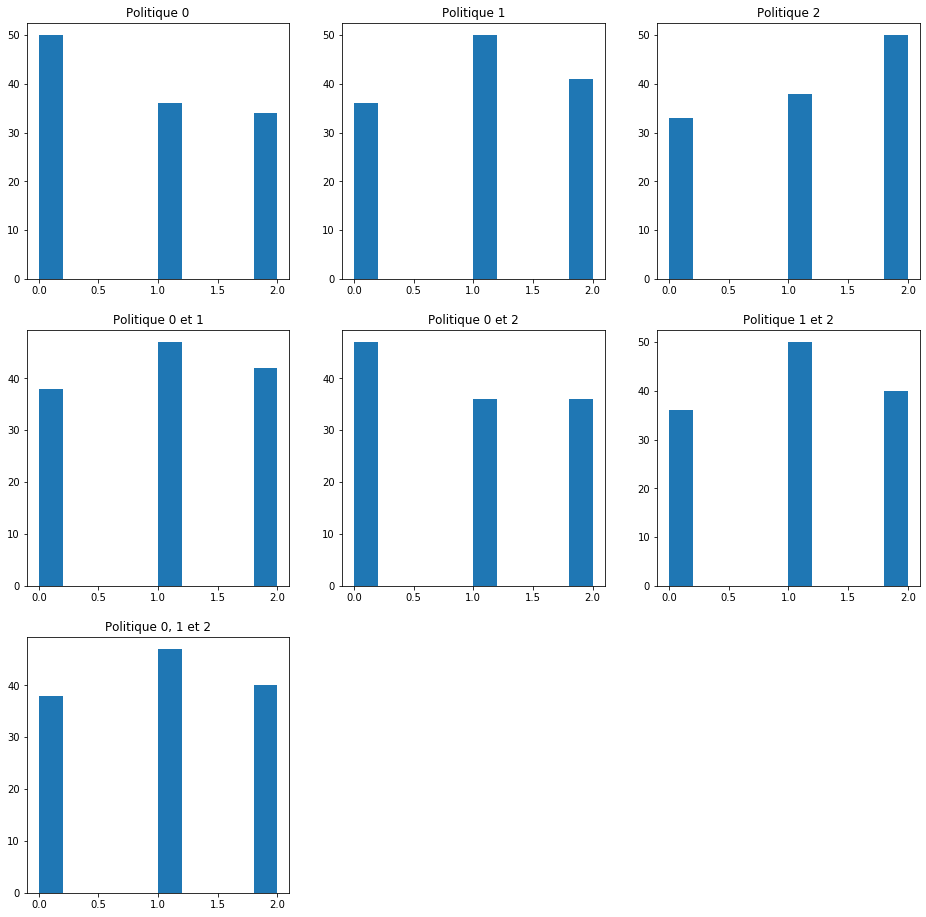

In [41]:
dispo_uts = np.floor(np.random.normal(400,5,N_utilisateurs))
plt.figure(figsize=(16,16))

politique = np.array([1,0,0])
df2, DATA = distribue(df, dispo_uts, M, Mp, politique)                
ax1 = plt.subplot(331,title='Politique 0')
ax1.hist(DATA);


politique = np.array([0,1,0])
df2, DATA = distribue(df, dispo_uts, M, Mp, politique)                
ax2 = plt.subplot(332,title='Politique 1')
ax2.hist(DATA);

politique = np.array([0,0,1])
df2, DATA = distribue(df, dispo_uts, M, Mp, politique)                
ax3 = plt.subplot(333,title='Politique 2')
ax3.hist(DATA);

politique = np.array([1,1,0])
df2, DATA = distribue(df, dispo_uts, M, Mp, politique)                
ax4 = plt.subplot(334,title='Politique 0 et 1')
ax4.hist(DATA);


politique = np.array([1,0,1])
df2, DATA = distribue(df, dispo_uts, M, Mp, politique)                
ax5 = plt.subplot(335,title='Politique 0 et 2')
ax5.hist(DATA);


politique = np.array([0,1,1])
df2, DATA = distribue(df, dispo_uts, M, Mp, politique)                
ax6 = plt.subplot(336,title='Politique 1 et 2')
ax6.hist(DATA);


politique = np.array([1,1,1])
df2, DATA = distribue(df, dispo_uts, M, Mp, politique)                
ax7 = plt.subplot(337,title='Politique 0, 1 et 2')
ax7.hist(DATA);


print(N_utilisateurs, 'utilisateurs',N_competences,'compétences', N_projets,'projets')

In [40]:
def distribue(df_taches, dispo_uts, Matrice_competences, Matrice_projet, preferences):
    CHOIX = []
    M = Matrice_competences
    Mp = Matrice_projet
    politique = preferences/preferences.sum()
    df = df_taches
    non_projet = 0
    compteur = 0
    for index, row in df.iterrows():
        comp = row['Compétence']
        proj = row['Projet']
        duree = row['Durée']
        uts_candidats = np.where(dispo_uts >= duree)[0]
    
        if len(uts_candidats) == 0 :
            print("Aucun utilisateur n'est libre pour réaliser cette tache")
        else :
            uts_candidats = np.intersect1d(np.where(M[comp,:]  > 0)[0], uts_candidats)
            if len(uts_candidats) == 0:
                print("utilisateur libre ne dispose de la compétence requise pour cette tâche")
            else :
                uts_candidats2 = np.intersect1d(np.where(Mp[proj,:] == 1)[0],uts_candidats)
                if len(uts_candidats2) == 0 :
                    #print("Aucun utilisateur compétent restant n'a travaillé sur ce projet")
                    loi0 = M[comp,uts_candidats] / M[comp,uts_candidats].sum()
                    loi1 = 1 - scores_uts[uts_candidats]/scores_uts[uts_candidats].max()
                    loi2 = dispo_uts[uts_candidats]/dispo_uts[uts_candidats].sum()
                    LOI = politique[0] * loi0 + politique[1] * loi1 + politique[2]* loi2
                    
                    lepluscomp = uts_candidats[np.argmax(M[comp,uts_candidats])]
                    lemoinspoly = uts_candidats[np.argmin(scores_uts[uts_candidats])]
                    lemoinsbusy = uts_candidats[np.argmax(dispo_uts[uts_candidats])]
                    argchoix = np.argmax(LOI)
                    choix = uts_candidats[argchoix]
                    
                    dispo_uts[choix] -= duree
                    if choix == lepluscomp:
                        CHOIX.append(0)
                    if choix == lemoinspoly:
                        CHOIX.append(1)
                    if choix == lemoinsbusy:
                        CHOIX.append(2)
                    non_projet +=1
                    
                    
                    choix = uts_candidats[np.argmax(LOI)]
                    dispo_uts[choix] -= duree
                    df.loc[index,'Assignée à'] = choix
                else :
                    loi0 = M[comp,uts_candidats2] / M[comp,uts_candidats2].sum()
                    loi1 = 1 - scores_uts[uts_candidats2]/scores_uts[uts_candidats2].max()
                    loi2 = dispo_uts[uts_candidats2]/dispo_uts[uts_candidats2].sum()
                    LOI = politique[0] * loi0 +politique[1] * loi1 + politique[2]* loi2

                    argchoix = np.argmax(LOI)
                    choix = uts_candidats2[argchoix]


                    lepluscomp = uts_candidats2[np.argmax(M[comp,uts_candidats2])]
                    lemoinspoly = uts_candidats2[np.argmin(scores_uts[uts_candidats2])]
                    lemoinsbusy = uts_candidats2[np.argmax(dispo_uts[uts_candidats2])]

                    dispo_uts[choix] -= duree
                    if choix == lepluscomp:
                        CHOIX.append(0)
                    if choix == lemoinspoly:
                        CHOIX.append(1)
                    if choix == lemoinsbusy:
                        CHOIX.append(2)
                    df.loc[index,'Assignée à'] = choix
        compteur +=1
    print(non_projet / compteur *100, "% des tâches ont été affectées à des personnes non impliquées dans le projet concerné.")
                    
    return df, CHOIX

(array([11.,  0.,  8.,  0.,  0., 11.,  0., 14.,  0.,  6.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

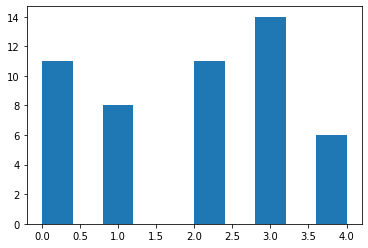

In [153]:
df2

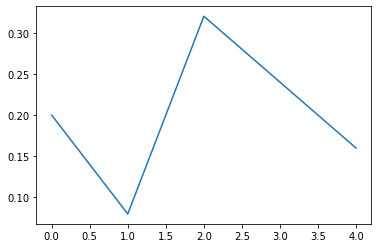

In [149]:
plt.plot(scores_comp)

In [142]:
Mp

array([[1., 1., 1., 0., 1., 1.],
       [0., 1., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 1.],
       [1., 0., 0., 0., 1., 0.],
       [1., 1., 0., 0., 1., 0.]])

In [144]:
M

array([[2., 1., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [3., 1., 2., 0., 1., 1.],
       [0., 2., 1., 0., 2., 1.],
       [0., 1., 0., 1., 2., 0.]])

In [61]:
politique = (np.array([1,4,3]))**1
politique = politique / politique.sum()
politique

array([0.125, 0.5  , 0.375])

In [44]:
dispo_uts.sum()

236.0

In [13]:
def penHIST(x, detail =False):
    global Mp
    global tasks
    global N_utilisateurs
    pen = np.zeros(N_utilisateurs)
    for i in range(N_utilisateurs):
        index = np.where(x[1,:]== i)[0]
        hist = np.where(Mp[:,i]== 1)[0]
        t = tasks[3,index]
        new_pen = 0
        for j in t:
            if not j in hist :
                new_pen += 1

        pen[i] = new_pen / max(1,len(t))
    
    return pen.sum()/N_utilisateurs if not detail else pen

penHIST(x)

0.5668350168350168

# Calcul des temps d'occupations :

on va ici calculer le pourcentage d'occupation de chacun des utilisateurs

In [14]:
def TO(assignation, dispo_uts):
    N_utilisateurs = len(dispo_uts)
    score_TO = np.zeros(N_utilisateurs)
    for i in range(N_utilisateurs) :
        index = np.where(assignation[1,:] == i)[0]
        score_TO[i] = tasks[1,index].sum() / dispo_uts[i]
    return score_TO /score_TO.max()

to = TO(assignation, dispo_uts)

NameError: name 'assignation' is not defined

On voit qu'avec cette répartition des taches, l'utilisateur 0 est occupé à score_T0[0].

On va par la suite chercher à occuper le plus possible les utilisateurs ayant peu de compétences

In [15]:
def penTO(assignation, detail=False):
    global dipso_uts
    global scores_uts
    N_utilisateurs = len(dispo_uts)
    pen = np.zeros(N_utilisateurs)
    
    score_TO = np.zeros(N_utilisateurs)
    for i in range(N_utilisateurs) :
        index = np.where(assignation[1,:] == i)[0]
        score_TO[i] = tasks[1,index].sum() / dispo_uts[i]
    score_TO /= score_TO.max()
    
    
    for i in range(N_utilisateurs) :
        new_pen = 0
        new_pen = (1-scores_uts[i]) * np.abs(1-score_TO[i])
        pen[i] = new_pen
        
    if not detail :
        return pen.sum()
    else: return to

penTO(x)

0.5016631652661065

In [16]:
def makeNeighbour(configuration):
    global N_utilisateurs
    i = np.random.randint(0,configuration.shape[1])
    configuration[1,i] = np.random.randint(0,N_utilisateurs)
    return configuration

In [17]:
def Etot(scores) : 
    global pref
    return np.vdot(pref,scores)

In [18]:
def getScores(x):
    return np.array([penTO(x),penHIST(x)])

100%|█████████████████████████████████████| 2999/2999 [00:05<00:00, 561.58it/s]


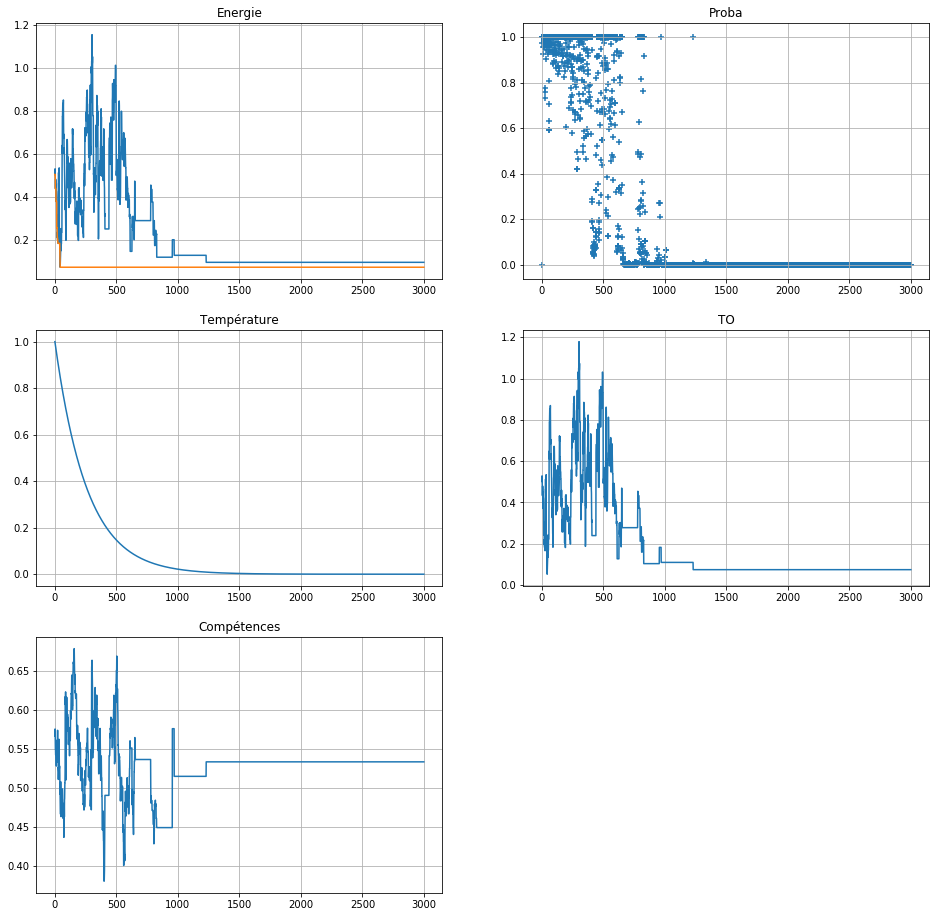

In [19]:
N_iter = N_taches * N_utilisateurs * 10
xmin = x
pref = np.array([100,5])
pref = pref/ pref.sum()

E = np.zeros(N_iter)
Emin = np.zeros(N_iter)
Proba = np.zeros(N_iter)

Scores = np.zeros((N_iter,2))
Scores[0,:] = getScores(x)
E[0] = Etot(Scores[0,:])
Emin[0] = E[0]

c = 1
T = c
Tmin = 1e-5
decay = 1 - np.exp(np.log(Tmin/c)/1/N_iter)



for i in tqdm(range(1,N_iter)):
    T = T* (1-decay) if T > Tmin else Tmin
    
    y = makeNeighbour(x)
    
    tmpScores = getScores(y)
    Ey = Etot(tmpScores)
    delta = Ey - E[i-1]
    
    Proba[i] = min(1,np.exp(-delta/T))
    if np.random.rand() < Proba[i]:
        x = np.copy(y)
        E[i] = Ey
        Scores[i,:] = tmpScores
    else :
        E[i] = E[i-1]
        Scores[i,:] = Scores[i-1,:]
    
    Emin[i] = E[i] if E[i] < Emin[i-1] else Emin[i-1]
                                                 

plt.figure(figsize=(16,16))
ax1 = plt.subplot(321, title='Energie')
ax1.grid()
ax1.plot(range(N_iter),E)
ax1.plot(range(N_iter),Emin)

ax2 = plt.subplot(322, title = 'Proba')
ax2.grid()
ax2.scatter(range(N_iter),Proba,marker="+")

ax3 = plt.subplot(323, title ='Température')
ax3.grid()
ax3.plot(range(N_iter), (1-decay) ** np.arange(N_iter))

ax4 = plt.subplot(324, title = 'TO')
ax4.grid()
ax4.plot(range(N_iter), Scores[:,0])

ax5 = plt.subplot(325, title="Compétences")
ax5.grid()
ax5.plot(range(N_iter), Scores[:,1])